# Writing datasets to HDF5 databases

Uses the data that was converted to right format and moved to right folders in the previous notebook.

**Pipeline**:
1. Add mirror padding to images and corresponding masks
2. Patch images and corresponding masks to arrays of patches. Each patch is 'patch_size'x'patch_size' (config.py).
3. Do rigid augmentations to some of the patches (augmentations.py)
4. Crop patches to final network 'input_size' (config.py)
5. save patches to .pytable (hdf5) file

**Note**: If dataset is **pannuke** no patching, augmenting or cropping is done. (Augmentations maybe in the future)

In [1]:
# HDF5 file structure:
# 
# folder for hdf5 db
#    |
#    |____train.pytable (root HDF5-file)
#    |       |
#    |       |____EArray(Filename)
#    |       |
#    |       |____EArray(img)
#    |       |       |
#    |       |       |____ np.ndarray (n_patches, H, W)
#    |       |                 .
#    |       |                 .
#    |       |                 .
#    |       |
#    |       |____EArray(inst_map)
#    |       |        |
#    |       |        |____ np.ndarray (n_patches, H, W)
#    |       |                  .
#    |       |                  .
#    |       |                  .
#    |       |
#    |       |____EArray(type_map)
#    |       |        |
#    |       |        |____ np.ndarray (n_patches, H, W)
#    |       |                  .
#    |       |                  .
#    |       |                  .
#    |       |
#    |       |
#    |       |____CArray(numpixels)
#    |   
#    |
#    |___test.pytable (root HDF5 file)
#    |       |
#    |       |____EArray(Filename)
#    |       |
#    |       |____EArray(img)
#    |       |       |
#    |       |       |____ np.ndarray (n_patches, H, W, 3)
#    |       |                 .
#    |       |                 .
#    |       |                 .
#    |       |
#    |       |____EArray(inst_map)
#    |       |        |
#    |       |        |____ np.ndarray (n_patches, H, W)
#    |       |                  .
#    |       |                  .
#    |       |                  .
#    |       |
#    |       |____EArray(type_map)
#    |       |        |
#    |       |        |____ np.ndarray (n_patches, H, W)
#    |       |                  .
#    |       |                  .
#    |       |                  .
#    |       |
#    |       |
#    |       |____CArray(numpixels)
#    |    
#    .
#    .
#    .then
# 

In [2]:
from src.conf.config import CONFIG
from src.utils.data_writer import PatchWriter

In [3]:
config = CONFIG

# Kumar

In [4]:
config.dataset_args.dataset = "kumar"
writer_kumar = PatchWriter.from_conf(config)

In [5]:
writer_kumar.write_dbs()

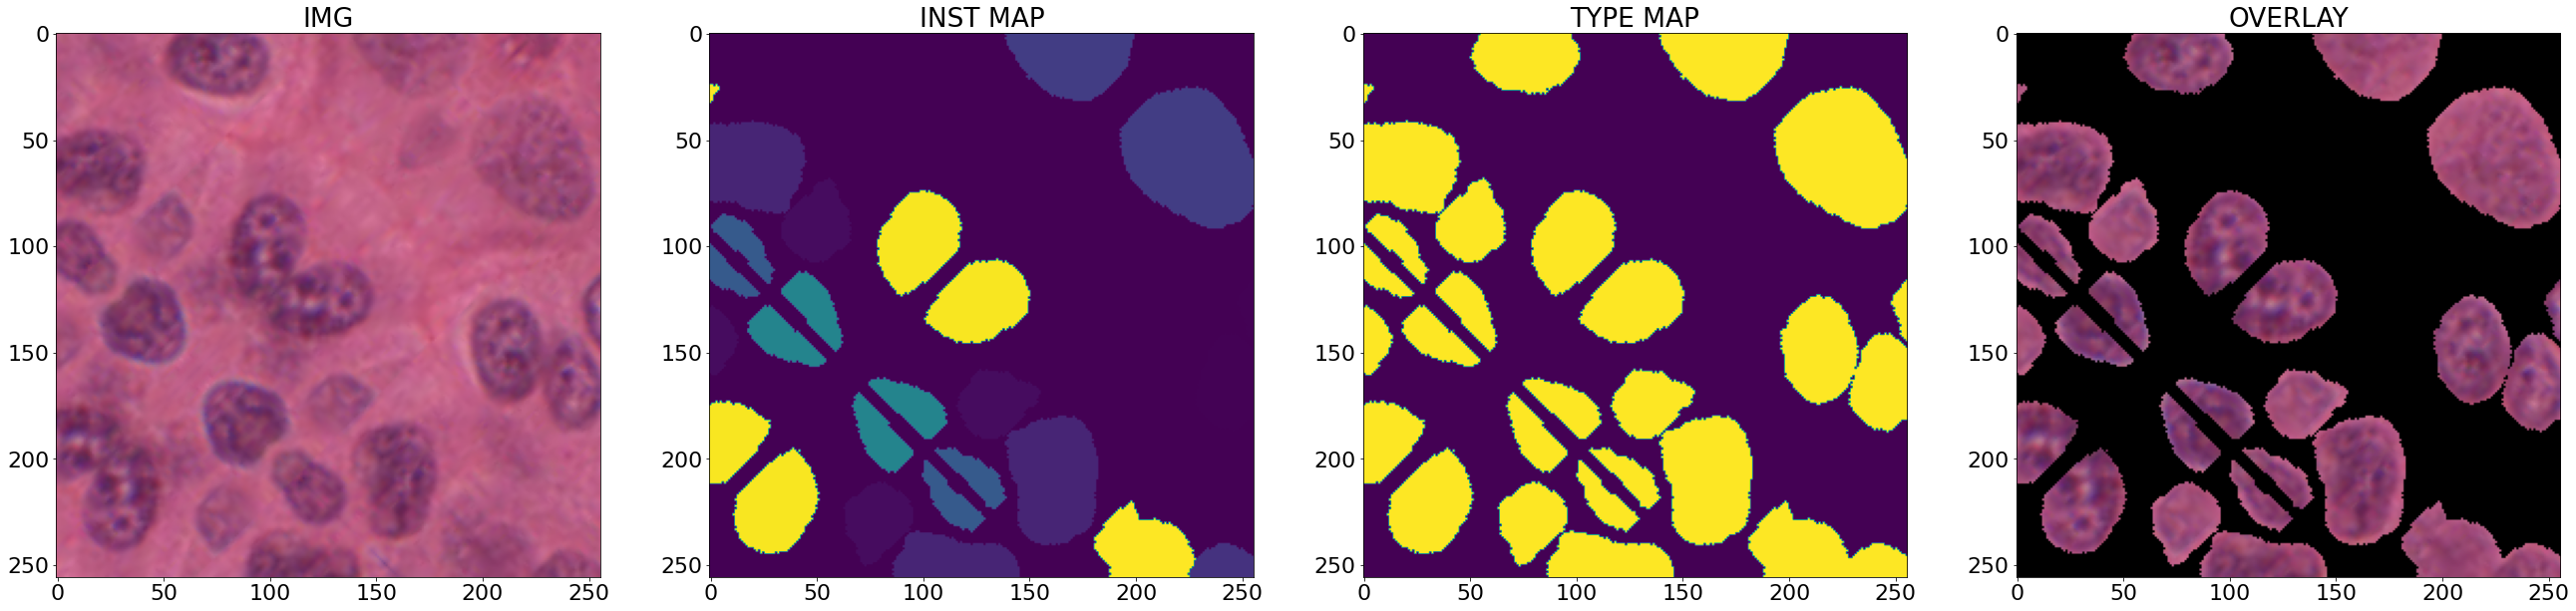

(array([  0,   1,   2,   3,  15,  46,  64,  80, 125, 199, 436, 440],
       dtype=int32),
 array([0, 1], dtype=int32))

In [6]:
# Vizualize a patch to see everything went well
writer_kumar.viz_patch_from_db(phase="train", index=0)

In [7]:
# check an example on how the patches look for a single image
# writer_kumar.viz_patched_img(phase="train", img_type="overlay", index=0)

# Consep

In [8]:
config.dataset_args.dataset = "consep"
writer_consep = PatchWriter.from_conf(config)

In [9]:
writer_consep.write_dbs()

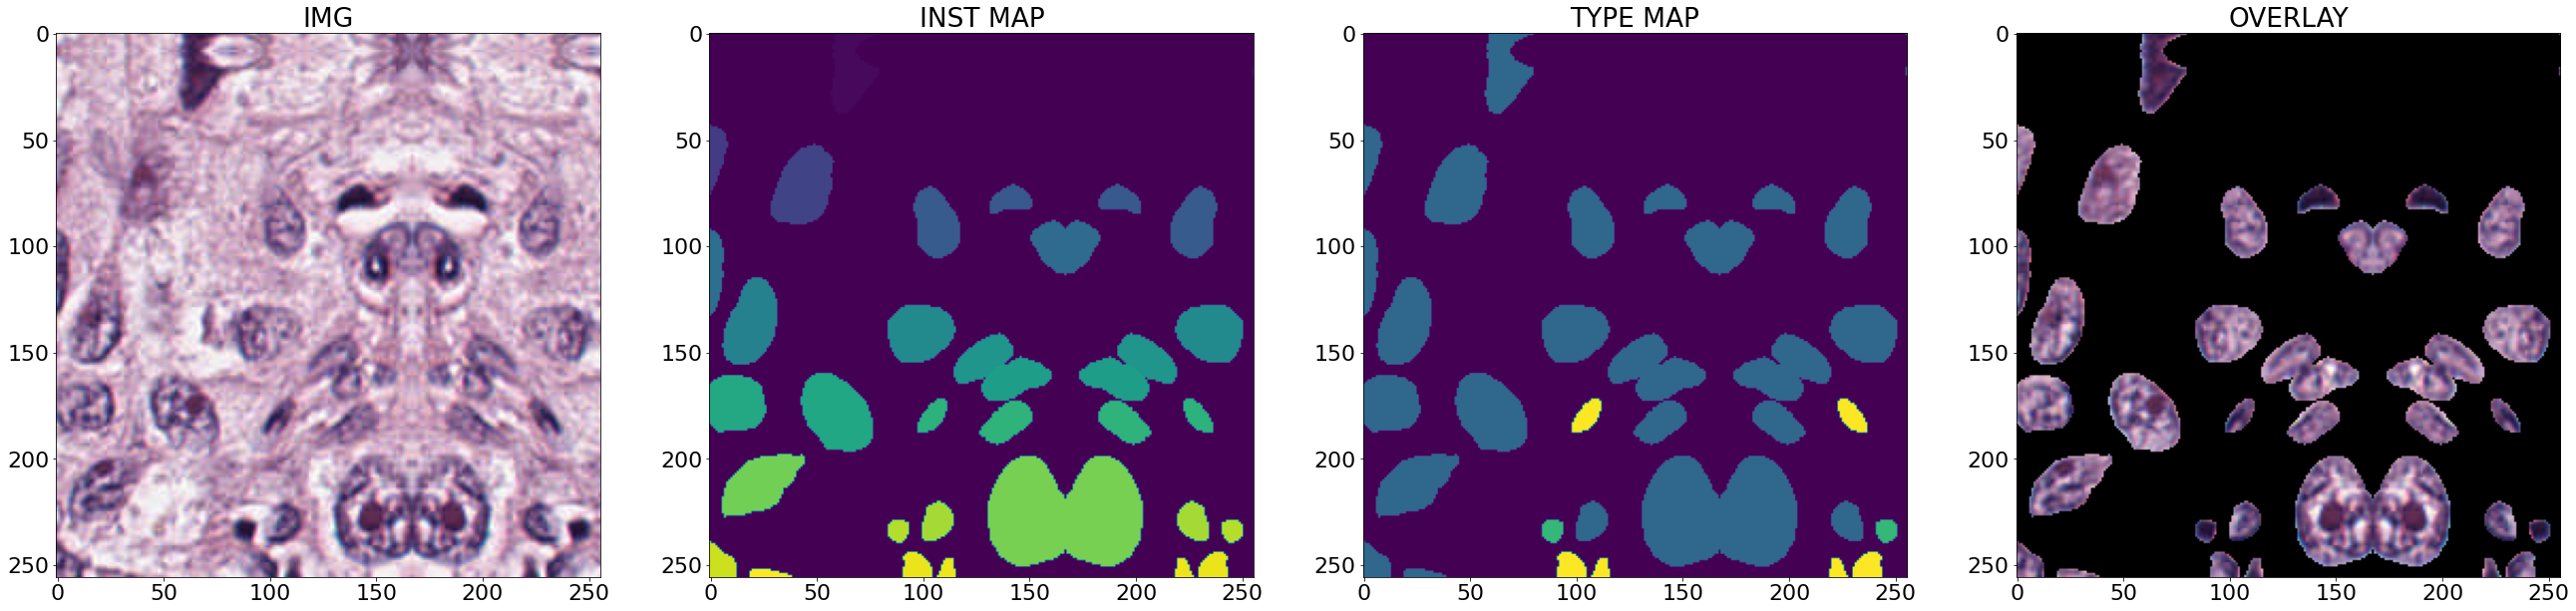

(array([  0,   4,  28,  33,  45,  46,  56,  59,  71,  77,  84,  90,  96,
         97, 104, 105, 127, 128, 139, 143, 149, 156, 157, 161], dtype=int32),
 array([0, 1, 2, 3], dtype=int32))

In [17]:
# Vizualize a patch to see everything went well
writer_consep.viz_patch_from_db(phase="train", index=3)

In [11]:
# check an example on how the patches look for a single image
# writer_consep.viz_patched_img(phase="test", img_type="overlay", index=0)

# Pannuke

- May take a couple mins

In [12]:
# if you don't want to augment pannuke datasetset patch_size and stride_size = 256
# if stride_size is less than 256 overlapped and mirrored patches are created
config.dataset_args.dataset = "pannuke"
config.patching_args.patch_size = 256
writer_pannuke = PatchWriter.from_conf(config)

In [13]:
writer_pannuke.write_dbs()

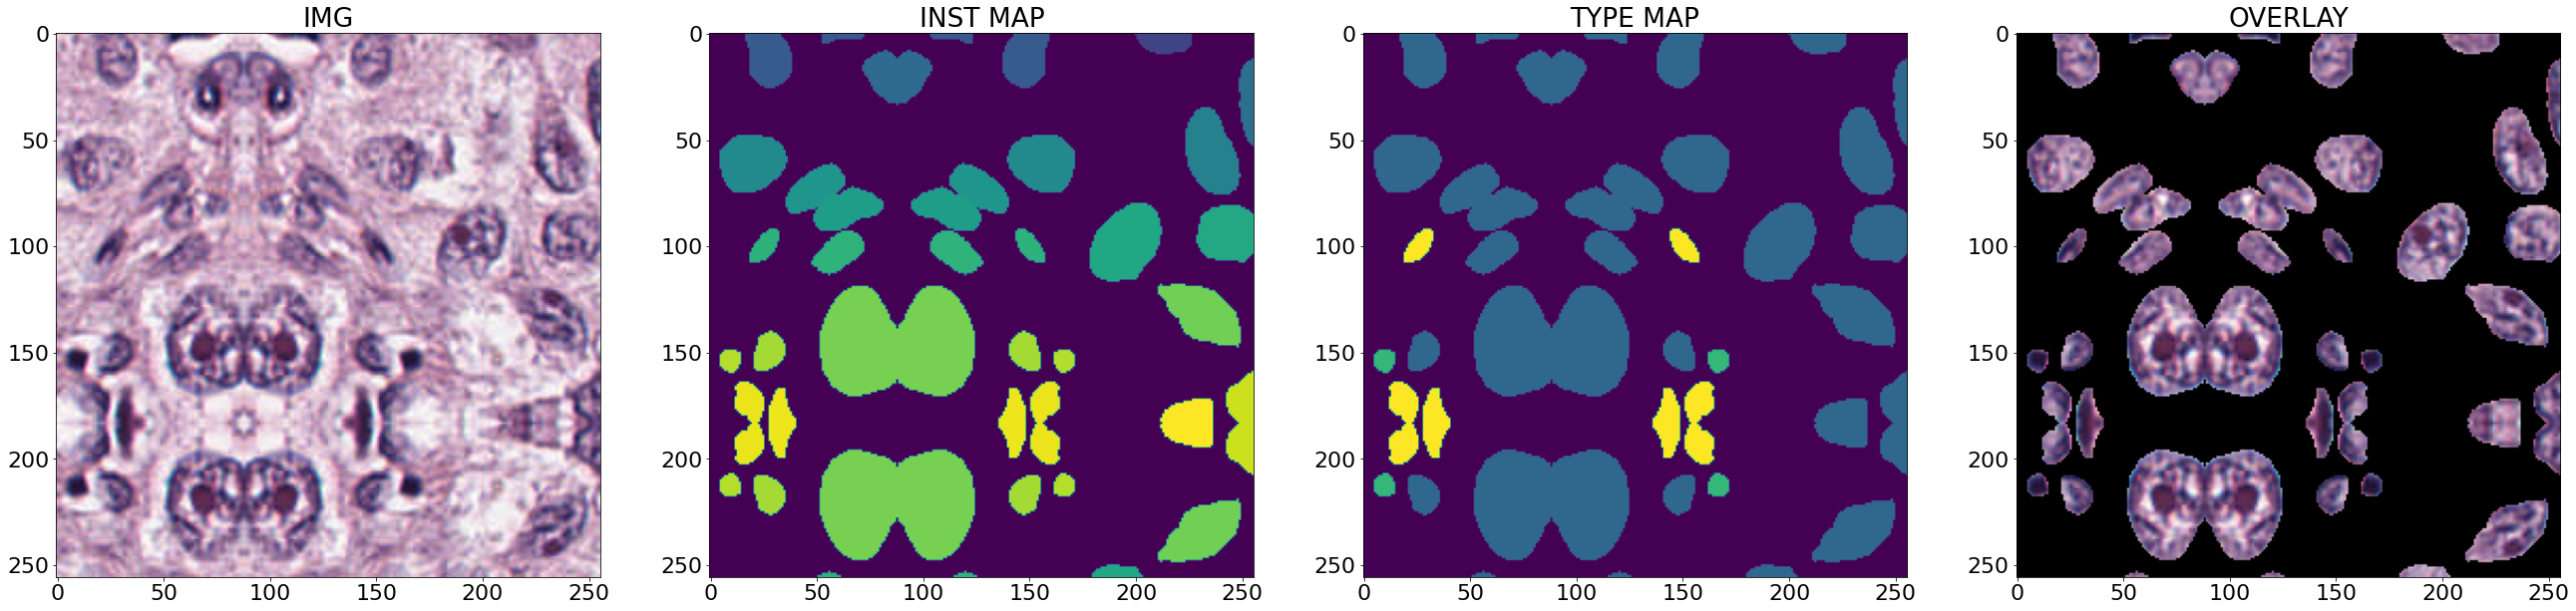

(array([  0,  33,  45,  46,  56,  59,  71,  77,  84,  90,  96,  97, 104,
        105, 127, 128, 139, 143, 149, 156, 157, 161], dtype=int32),
 array([0, 1, 2, 3], dtype=int32))

In [18]:
# Vizualize a patch to see everything went well
writer_pannuke.viz_patch_from_db(phase="train", index=6)

In [15]:
# check an example on how the patches look for a single image
# writer_pannuke.viz_patched_img(phase="valid", img_type="img", index=0)